# 11_2.Correlation(연습문제)
- https://pingouin-stats.org/build/html/generated/pingouin.corr.html#pingouin.corr

## 1.기본 package 설정

In [ ]:
# 그래프에서 한글 폰트 인식하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
!pip install pingouin

#  *** 런타임 다시 시작

In [1]:
# 1.기본
import numpy as np  # numpy 패키지 가져오기
import matplotlib.pyplot as plt # 시각화 패키지 가져오기
import seaborn as sns # 시각화

# 2.데이터 가져오기
import pandas as pd # csv -> dataframe으로 전환

# 3.통계분석 package
import pingouin as pg
from scipy import stats
import statsmodels.api as sm

In [2]:
# 기본세팅
# 테마 설정
sns.set_theme(style = "darkgrid")

# 한글 인식
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False # -인식

## 2.데이터 불러오기

### 2.1 데이터 프레임으로 저장
- 원본데이터(csv)를 dataframe 형태로 가져오기(pandas)

In [3]:
cr_df = pd.read_csv('https://raw.githubusercontent.com/leecho-bigdata/statistics-python/main/11_2.weight.csv', encoding="cp949")
cr_df.head()

,몸무게,키
0,72,176
1,72,172
2,70,182
3,43,160
4,48,163


### 2.2 자료구조 살펴보기

In [4]:
cr_df.shape

(30, 2)

In [5]:
cr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   몸무게     30 non-null     int64
 1   키       30 non-null     int64
dtypes: int64(2)
memory usage: 608.0 bytes


In [6]:
cr_df.columns

Index(['몸무게', '키'], dtype='object')

## 3.기술통계

In [7]:
# 그룹별 기술통계
cr_df.describe().round(3).T

,count,mean,std,min,25%,50%,75%,max
몸무게,30.0,62.700,11.520,43.0,54.00,63.0,72.00,88.0
키,30.0,170.333,8.683,148.0,164.25,170.0,175.75,188.0


## 4.Correlation

In [9]:
columns = ['몸무게', '키']

pg.pairwise_corr(cr_df, columns = columns)

,X,Y,method,alternative,n,r,CI95%,p-unc,BF10,power
0,몸무게,키,pearson,two-sided,30,0.856645,"[0.72, 0.93]",1.543745e-09,7.555e+06,0.999999


In [10]:
variables = ['몸무게', '키']

cr_df[variables].rcorr()

,몸무게,키
몸무게,-,***
키,0.857,-


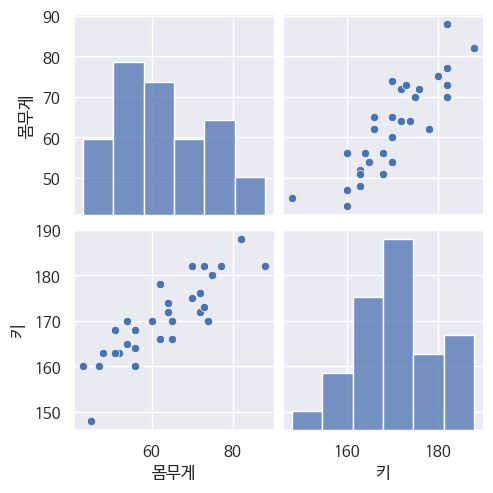

In [11]:
sns.pairplot(vars = variables,
             data = cr_df)
plt.show()